# 6章 アルゴリズムチェーンとパイプライン

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import mglearn

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# データをロードして分割
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# 訓練データの最小値と最大値を計算
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

svm = SVC()

svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
svm.score(X_test_scaled, y_test)

0.95104895104895104

In [3]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.98
Best set score: 0.97
Best parameters:  {'gamma': 1, 'C': 1}


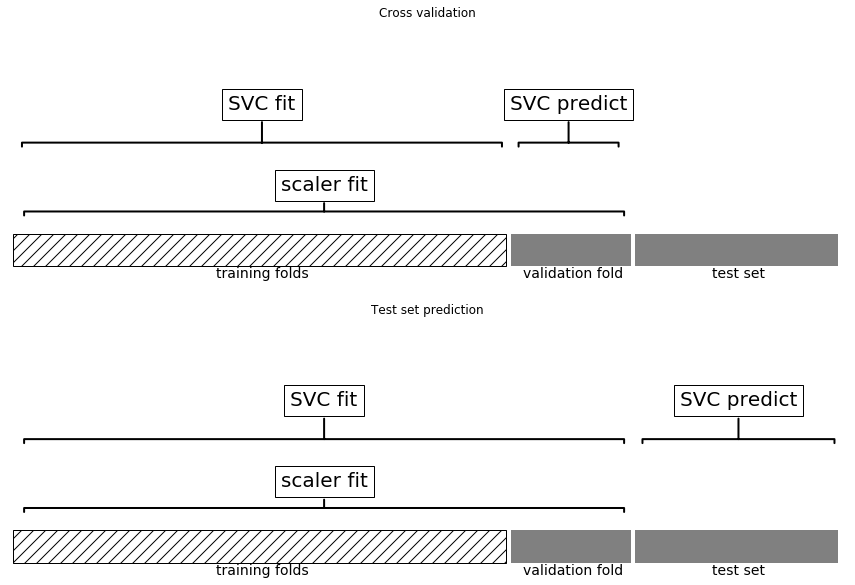

In [4]:
mglearn.plots.plot_improper_processing()

In [5]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.95104895104895104

# 6.3 パイプラインを用いたグリッドサーチ

In [6]:
param_grid = {"svm__C":[0.001, 0.01, 0.1, 1, 10, 100],
             "svm__gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.score(X_test, y_test))
print(grid.best_params_)

0.981220657277
0.972027972028
{'svm__gamma': 1, 'svm__C': 1}


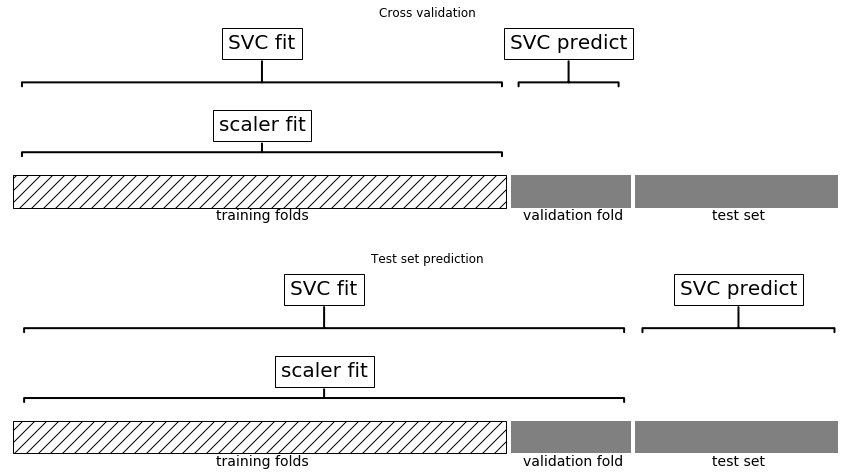

In [7]:
mglearn.plots.plot_proper_processing()

In [8]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
X.shape, y.shape

((100, 10000), (100,))

In [10]:
X[:5]

array([[  1.76405235e+00,   4.00157208e-01,   9.78737984e-01, ...,
          5.16872179e-01,  -3.29206931e-02,   1.29811143e+00],
       [ -2.02117027e-01,  -8.33231001e-01,   1.73360025e+00, ...,
         -5.72592527e-02,  -1.05893126e+00,  -3.26528442e-01],
       [  3.30045889e-01,  -4.79979434e-04,   8.18115898e-01, ...,
         -1.51127631e+00,   9.76843833e-01,   1.25550065e+00],
       [  3.71232144e-01,   3.04783891e-01,   5.04124602e-01, ...,
          1.68985759e+00,   1.99966492e-01,  -1.22433070e+00],
       [ -1.93950036e+00,   7.38850454e-01,   1.39468453e+00, ...,
         -2.50341767e-01,   5.84727988e-01,  -1.25082696e+00]])

In [11]:
y[:5]

array([ 0.51424689,  1.11286451,  0.67502449, -0.56055678, -0.83489841])

In [14]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
X_selected.shape

(100, 500)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))

0.90579530652398221

In [17]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression,
                                           percentile=5)),
                ("ridge", Ridge())])
np.mean(cross_val_score(pipe, X, y, cv=5))

-0.2465542238495281

# 6.4 汎用パイプラインインターフェイス

In [20]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

pipe_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [23]:
pipe_short.get_params()

{'memory': None,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'svc': SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'svc__C': 100,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking':

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.steps

[('standardscaler-1',
  StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('standardscaler-2',
  StandardScaler(copy=True, with_mean=True, with_std=True))]

In [27]:
pipe.fit(cancer.data)
components = pipe.named_steps["pca"].components_
print(components)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [28]:
components.shape

(2, 30)

In [32]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {"logisticregression__C":[0.01, 0.1, 1, 10, 100]}

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=4)
print(X_train.shape)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

grid.best_estimator_

(426, 30)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [33]:
grid.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.38856355, -0.37529972, -0.37624793, -0.39649439, -0.11519359,
         0.01709608, -0.3550729 , -0.38995414, -0.05780518,  0.20879795,
        -0.49487753, -0.0036321 , -0.37122718, -0.38337777, -0.04488715,
         0.19752816,  0.00424822, -0.04857196,  0.21023226,  0.22444999,
        -0.54669761, -0.52542026, -0.49881157, -0.51451071, -0.39256847,
        -0.12293451, -0.38827425, -0.4169485 , -0.32533663, -0.13926972]])

# 6.5 前処理ステップとモデルパラメータに対するグリッドサーチ